# Crop Recommendation Model

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [172]:
dataset = pd.read_csv("Crop_recommendation.csv")

In [173]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [174]:
dataset.shape

(2200, 8)

In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [176]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [177]:
dataset.duplicated().sum()

0

In [178]:
# we have the cleaned datatset in which we dont have the null value and also dont have the duplicate Value.
#  Also this is the Multiclass Classififcation supervised Problem.

In [179]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [180]:
correlation = dataset.drop("label", axis=1)

In [181]:
correlation.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


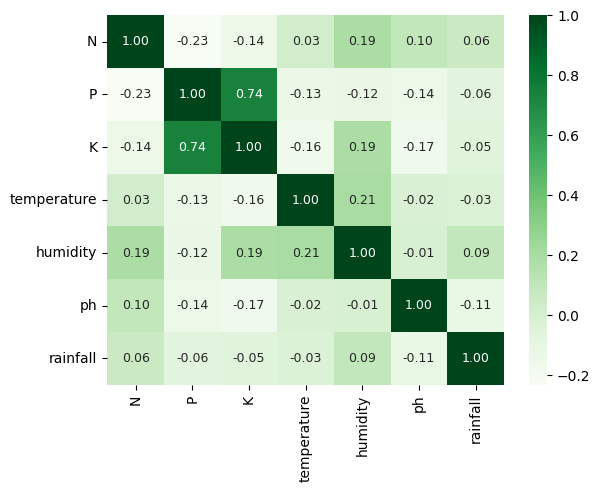

In [182]:
#  PLot the Heatmap for finding the correlation between the features.
sns.heatmap(correlation.corr(), cmap="Greens", fmt='.2f', annot=True, annot_kws={"size" :9})
plt.show()

In [183]:
dataset["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [184]:
dataset["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

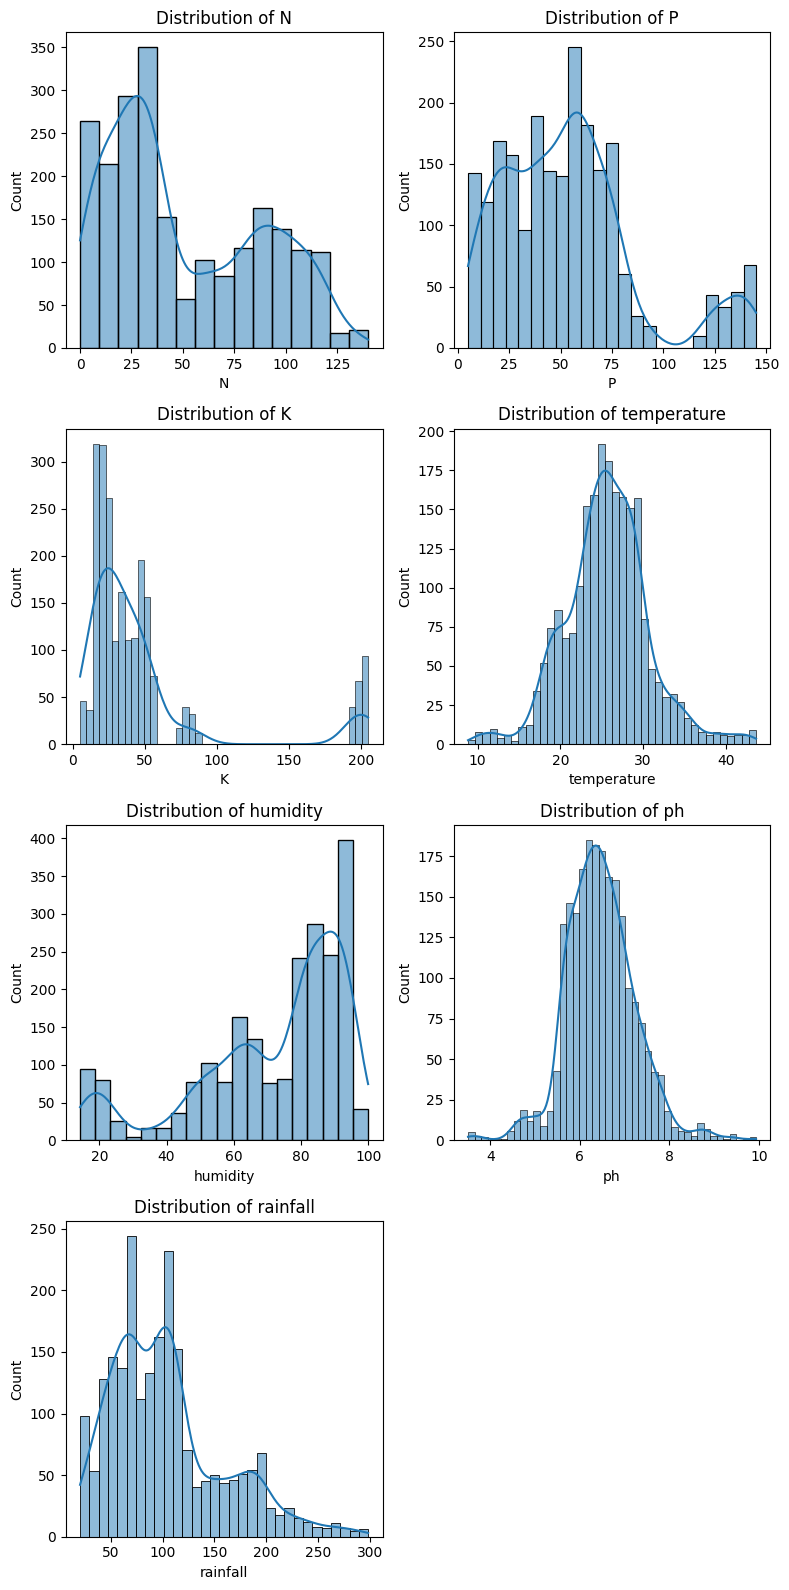

In [185]:
#  Create the distribution for the features.
plt.figure(figsize=(8,16))
for index, val in enumerate(correlation.columns):
    plt.subplot(4,2,index + 1)
    sns.histplot(dataset[val], kde=True)
    plt.title(f"Distribution of {val}")
    plt.xlabel(val)

plt.tight_layout()
plt.show()

In [186]:
dataset.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [187]:
#  we just need to encoded the values of the label.
crop_dict = {
    'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5,
       'mothbeans': 6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16,
       'orange': 17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22}
crop_dict

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [188]:
#  now we need to replace these values to the actual value in the label feature.
dataset.replace({"label": crop_dict}, inplace=True) 

In [189]:
dataset.label.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [190]:
#  Split the data into the dependent and the independent Variable.
x = dataset.drop("label", axis=1)
y = dataset["label"]

In [191]:
#  Perform the Train and Test Split into our Dataset.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [192]:
print(x.shape, x_train.shape, x_test.shape)

(2200, 7) (1760, 7) (440, 7)


In [193]:
#  Scaling the Data for better Scaling.

In [194]:
mx = MinMaxScaler()

In [195]:
x_train = mx.fit_transform(x_train)
x_test = mx.transform(x_test)

In [196]:
print(x_train.shape, x_test.shape)

(1760, 7) (440, 7)


In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [200]:
#  Create the Pipeline for all the models.

In [201]:
models = {
    "LogisticRegression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "KNeighbourClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(), }

In [202]:
for name,model in models.items():
    model.fit(x_train, y_train)
    train_score = accuracy_score(model.predict(x_train),  y_train)
    test_score = accuracy_score(model.predict(x_test),  y_test)
    print(f"{name} model with training accuracy: {train_score}")
    print(f"{name} model with testing accuracy: {test_score}")
    print("-" * 70)

LogisticRegression model with training accuracy: 0.9727272727272728
LogisticRegression model with testing accuracy: 0.9659090909090909
----------------------------------------------------------------------
GaussianNB model with training accuracy: 0.99375
GaussianNB model with testing accuracy: 0.9977272727272727
----------------------------------------------------------------------
SVC model with training accuracy: 0.9852272727272727
SVC model with testing accuracy: 0.9840909090909091
----------------------------------------------------------------------
KNeighbourClassifier model with training accuracy: 0.9840909090909091
KNeighbourClassifier model with testing accuracy: 0.975
----------------------------------------------------------------------
DecisionTreeClassifier model with training accuracy: 1.0
DecisionTreeClassifier model with testing accuracy: 0.9840909090909091
----------------------------------------------------------------------
ExtraTreeClassifier model with training acc

In [203]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [204]:
#  Save the best model in the form of the Pickle format.
import pickle

In [205]:
pickle.dump(model, open("bestmodel.pkl", "wb"))

In [206]:
pickle.dump(mx, open("min_max_scaler.pkl", "wb"))

In [207]:
load_model = pickle.load(open("min_max_scaler.pkl", "rb"))

In [208]:
load_model

MinMaxScaler()

In [209]:
#  Save the Standard Scaler for the future data.
pickle.dump(scaler, open("standard_scaler.pkl", "wb"))

In [210]:
#  Build the Predictive System.

In [211]:
x_test[0]

array([-1.20156631,  2.64237735,  3.10717791, -1.54920968,  0.51645148,
       -0.19935515, -0.62064641])

In [212]:
y_test

1270    13
1481    15
1832    19
293      3
1307    14
        ..
1893    19
2009    21
2191    22
1047    11
480      5
Name: label, Length: 440, dtype: int64

In [213]:
crop_dict = {
    1: 'rice',
    2: 'maize',
    3: 'chickpea',
    4: 'kidneybeans',
    5: 'pigeonpeas',
    6: 'mothbeans',
    7: 'mungbean',
    8: 'blackgram',
    9: 'lentil',
    10: 'pomegranate',
    11: 'banana',
    12: 'mango',
    13: 'grapes',
    14: 'watermelon',
    15: 'muskmelon',
    16: 'apple',
    17: 'orange',
    18: 'papaya',
    19: 'coconut',
    20: 'cotton',
    21: 'jute',
    22: 'coffee'
}

In [214]:
prediction = model.predict([[-1.20156631,  2.64237735,  3.10717791, -1.54920968,  0.51645148,
       -0.19935515, -0.62064641]])

print(f"The best crop to be cultivated are:- {crop_dict[prediction[0]]}")

The best crop to be cultivated are:- grapes
